### Download zip folder of image from web url 

In [7]:
import wget
from zipfile import ZipFile
from pathlib import Path

def download_and_extract_zip_into_folder(
    zip_url : str,
    data_dir : str = "data/"
)->None:
    """Download and Extract Zip Url into target folder

    Args:
        zip_url (str): url of zip file
        data_dir (str, optional): folder to extract data. Defaults to "data/".
    """
    data_path = Path(data_dir)
    zip_name = Path(zip_url).stem
    
    # Setup new folder path into data folder
    new_folder_path = data_path / zip_name

    # If the new folder doesn't exist, download it and prepare it... 
    if new_folder_path.is_dir():
        print(f"[INFO] : {new_folder_path} directory exists, do nothing.")

    else:
        print(f"[INFO] : Creating {new_folder_path} directory")
        new_folder_path.mkdir(parents=True, exist_ok=True)

        # Download zip file
        zip_file = wget.download(zip_url)
        print(f"[INFO] : Download {zip_file}")
        zip_file = Path(zip_file)
        
        # Unzip zipfile in new folder
        ziper = ZipFile(zip_file)
        ziper.extractall(new_folder_path)
        print(f"[INFO] : Extract {zip_file} here : {new_folder_path}")

        # Remove zip File
        print(f"[INFO] : Remove {zip_file}...")
        zip_file.unlink()
    
    return (new_folder_path)

In [8]:
dataset_path = download_and_extract_zip_into_folder(
    zip_url="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
    data_dir="data/")

[INFO] : Creating data/pizza_steak_sushi directory
[INFO] : Download pizza_steak_sushi.zip
[INFO] : Extract pizza_steak_sushi.zip here : data/pizza_steak_sushi
[INFO] : Remove pizza_steak_sushi.zip...


### Setup Path of Dataset

In [10]:
TRAIN_DIR = dataset_path / "train"
TEST_DIR = dataset_path / "test"

TRAIN_DIR, TEST_DIR

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### Create Image Transformer Compose 

In [11]:
from torchvision.transforms import Compose, Resize, ToTensor

preprocessing = Compose([
    ToTensor(),
    Resize(size=(224, 224)),
])

### Create `ImageFolder` Dataset

In [12]:
from torchvision.datasets import ImageFolder

train_dataset = ImageFolder(root=TRAIN_DIR,
                            transform=preprocessing)

test_dataset = ImageFolder(root=TEST_DIR,
                           transform=preprocessing)

len(train_dataset), len(test_dataset)

(225, 75)

### Convert `ImageFolder` to `DataLoader`

In [13]:
from torch.utils.data import DataLoader
import os 

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True 
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False # don't necessarily have to shuffle the testing data
)

len(train_dataloader), len(test_dataloader)

(8, 3)

### Visualize Random Image 

In [14]:
from typing import List
import matplotlib.pyplot as plt
import random
from torch.utils.data import Dataset

def display_random_image(dataset : Dataset,
                         classes : List[str] = None)->None:
    

    random_index = random.sample(range(len(dataset)), k=9)
    plt.figure(figsize=(17, 10))

    for index, sample in enumerate(random_index):

        img = dataset[sample][0]
        label = dataset[sample][1]
        
        plt.subplot(3, 3, index+1)
        plt.imshow(img.permute(dims=(1, 2, 0)))
        plt.axis("off")        

        if classes:
          title = f"Class : {classes[label]}"
          plt.title(title)

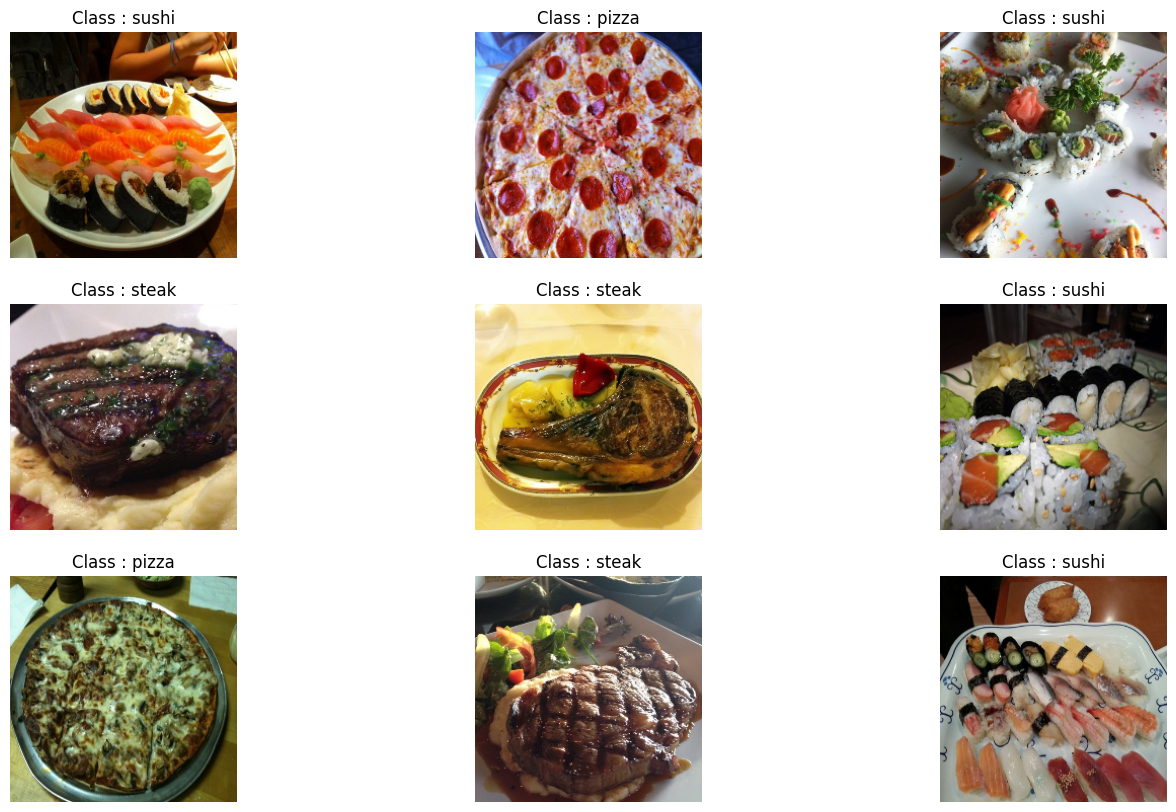

In [16]:
display_random_image(
    classes=train_dataset.classes,
    dataset=train_dataset,
)

### Save Dataset

In [18]:
import torch

SAVING_PATH = Path("data/dataset/")

train_dataset_path = SAVING_PATH / "train_dataset.pth"
test_dataset_path = SAVING_PATH / "test_dataset.pth"

torch.save(obj=train_dataloader, f=train_dataset_path)
torch.save(obj=test_dataloader, f=test_dataset_path)